# Shallow Water Test Case 1

## Component Being Tested

Atmosphere dynamical core, restricted to horizontal discretization only

## Description

Test Case 1 from the suite of shallow water test cases [@Williamson1992] has the following characteristics:

* A test of the atmospheric dynamical core
* A test of the 2D horizontal dynamics only
* A linear advective test, in which the the velocity is:
    - Specified,
    - Constant in time, and
    - Equivalent to solid body rotation, with specifiable angle $\alpha$ between the axis of solid body rotation and the polar axis
* The height field is a cosine bell, advected once around the sphere

The advecting wind is given by

$$
\begin{eqnarray}
    u(\lambda, \theta) &=& u_0 (\cos \theta \cos \alpha + \sin \theta \cos \lambda \sin \alpha),\\
    v(\lambda, \theta) &=& -u_0 \sin \lambda \sin \alpha.
\end{eqnarray}
$$

The initial cosine bell height field is given by

$$
h(\lambda, \theta) = \left\{
\begin{array}{lcr}
    (h_0/2)(1 + \cos (\pi r / R)) & \mbox{if} & r < R, \\
    0                             & \mbox{if} & r \ge R,
\end{array}
\right.
$$

where $r$ is the great circle distance between $(\lambda, \theta)$ and the initial bell center $(\lambda_c, \theta_c) = (3\pi / 2, 0)$:

$$
r = a \arccos [\sin \theta_c \sin \theta + \cos \theta_c \cos \theta \cos(\lambda - \lambda_c)],
$$

and $R = a/3$ is the radius of the cosine bell.

## Variable Definitions

$$
\begin{array}{ll}
    h         & \mbox{Shallow water height field} \\
    u         & \mbox{Longitudinal velocity} \\
    v         & \mbox{Latitudinal velocity} \\
    \lambda   & \mbox{Longitude} \\
    \theta    & \mbox{Latitude} \\
    \alpha    & \mbox{Solid body rotation angle of orientation} \\
    u_0       & \mbox{Advecting wind velocity, } 2\pi a/(12 \mbox{ days}) \\
    h_0       & \mbox{Maximum height value, 1000m} \\
    a         & \mbox{Radius of the earth, $6.37122 \times 10^6$ m} \\
    r         & \mbox{Great circle distance from the center of the cosine bell} \\
    R         & \mbox{Radius of the cosine bell} \\
    \lambda_c & \mbox{Longitudinal center of the initial cosine bell} \\
    \theta_c  & \mbox{Latitudinal center of the initial cosine bell}
\end{array}
$$

## Discussion

The initial height field, rendered on a cubed-sphere grid, for $(\lambda_c, \theta_c) = (0, \pi/4)$, looks like this:

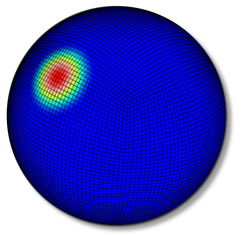

In [1]:
from IPython.display import display, Image
display(Image(filename='InitialHeightField.png'))

The velocity field, which corresponds to solid body rotation, advects the cosine bell around the globe in 12 days. If $\alpha = 0$, the bell advects along the equator.  If $\alpha = \pi / 2$, the bell advects over the north pole, and down past the south pole, before returning to its original position after 12 days.

Since the problem is purely advective, the cosine bell translates without changing shape, and the height field at $t$ = 12 days equals the initial hieght field at $t = 0$. Thus, a known analytic solution to the problem exists, and can be used to compute exact errors.

The test is run with values of $\alpha = 0, 0.05, \pi/2-0.05,$ and $\pi/2$. When $\alpha$ is near $\pi/2$, this an excellent test of how the dycore approximations to the horizontal derivatives behave near the poles. Historically, many dycores have had issues near the poles.

## Results

In [10]:
%matplotlib inline
from tools import plot_geopotential

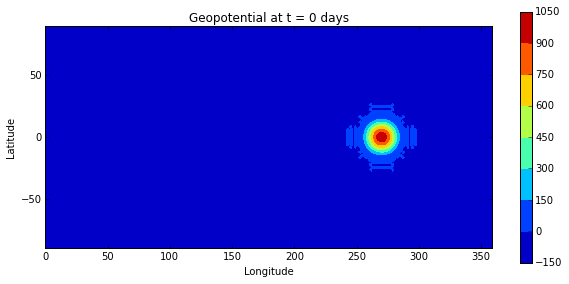

In [11]:
plot_geopotential(time=0)

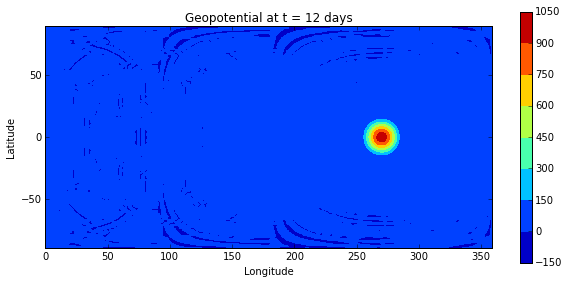

In [12]:
plot_geopotential(time=1)